In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('customer_support_tickets.csv')
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [89]:
df.isna().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [91]:
df['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

Is there a relationship between the age and the rating?

<Axes: xlabel='Customer Age'>

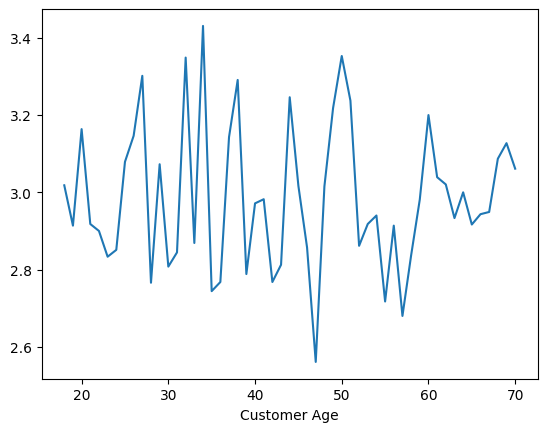

In [92]:
import matplotlib.pyplot as plt
df.groupby('Customer Age')['Customer Satisfaction Rating'].mean().plot()

In [93]:
df['Ticket Priority'].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Is there a relationship between the gender and the rating?

<Axes: ylabel='Customer Satisfaction Rating'>

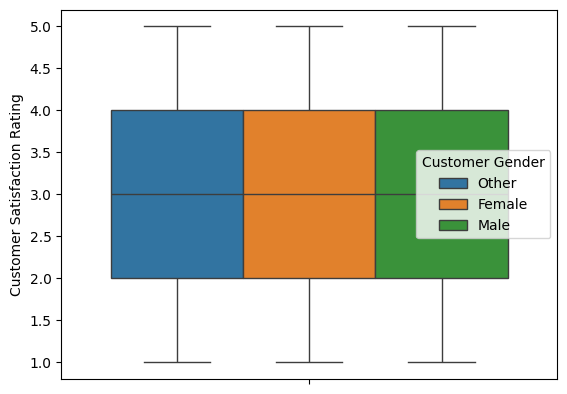

In [95]:
import seaborn as sns
sns.boxplot(data = df, y='Customer Satisfaction Rating', hue = 'Customer Gender')

In [96]:
df.groupby('Customer Gender')['Customer Satisfaction Rating'].mean()

Customer Gender
Female    2.971545
Male      3.028384
Other     2.974684
Name: Customer Satisfaction Rating, dtype: float64

In [97]:
df[['First Response Time', 'Time to Resolution']]

,First Response Time,Time to Resolution
0,2023-06-01 12:15:36,NaN
1,2023-06-01 16:45:38,NaN
2,2023-06-01 11:14:38,2023-06-01 18:05:38
3,2023-06-01 07:29:40,2023-06-01 01:57:40
4,2023-06-01 00:12:42,2023-06-01 19:53:42
...,...,...
8464,NaN,NaN
8465,NaN,NaN
8466,2023-06-01 09:44:22,2023-06-01 04:31:22
8467,2023-06-01 18:28:24,2023-06-01 05:32:24


Is there a relationship between the time it takes for a resolution to the rating?

In [162]:
df['Resolution Time'] = pd.to_datetime(df['Time to Resolution']).dt.hour - pd.to_datetime(df['First Response Time']).dt.hour 
df[~df['Resolution Time']>0][['First Response Time', 'Time to Resolution']]

,First Response Time,Time to Resolution
3,2023-06-01 07:29:40,2023-06-01 01:57:40
11,2023-06-01 12:05:51,2023-06-01 09:27:51
16,2023-06-01 19:46:59,2023-06-01 15:58:59
28,2023-05-31 23:17:17,2023-06-01 06:03:17
35,2023-06-01 07:56:25,2023-06-01 00:14:25
...,...,...
8452,2023-06-01 14:14:05,2023-06-01 05:47:05
8453,2023-06-01 12:56:06,2023-06-01 04:45:06
8455,2023-06-01 14:15:07,2023-06-01 06:58:07
8466,2023-06-01 09:44:22,2023-06-01 04:31:22


could be that resolution does not equal problem solved

In [99]:
df['Resolution']

0                                                 NaN
1                                                 NaN
2        Case maybe show recently my computer follow.
3       Try capital clearly never color toward story.
4                         West decision evidence bit.
                            ...                      
8464                                              NaN
8465                                              NaN
8466            Eight account century nature kitchen.
8467                            We seat culture plan.
8468                                              NaN
Name: Resolution, Length: 8469, dtype: object

<Axes: xlabel='Customer Satisfaction Rating', ylabel='Resolution Time'>

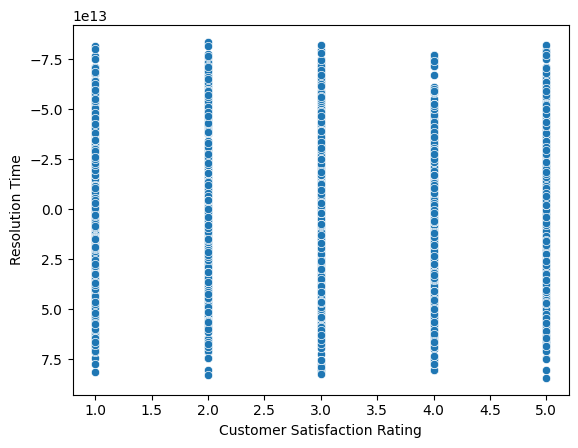

In [100]:
sns.scatterplot(data = df, x = 'Customer Satisfaction Rating', y = 'Resolution Time')

In [101]:
df.dropna(axis = 0, inplace = True)

In [102]:
df['Product Purchased'].unique()

array(['Dell XPS', 'Microsoft Office', 'Autodesk AutoCAD',
       'Nintendo Switch', 'Microsoft Xbox Controller', 'Sony PlayStation',
       'Xbox', 'Canon EOS', 'Fitbit Charge', 'GoPro Action Camera',
       'GoPro Hero', 'Google Pixel', 'HP Pavilion',
       'Nintendo Switch Pro Controller', 'LG Smart TV', 'Nest Thermostat',
       'Apple AirPods', 'Sony 4K HDR TV', 'Canon DSLR Camera',
       'Dyson Vacuum Cleaner', 'Roomba Robot Vacuum', 'PlayStation',
       'Sony Xperia', 'Samsung Galaxy', 'Asus ROG', 'Amazon Echo',
       'iPhone', 'Google Nest', 'Adobe Photoshop', 'LG Washing Machine',
       'Philips Hue Lights', 'Bose SoundLink Speaker',
       'Garmin Forerunner', 'Samsung Soundbar', 'MacBook Pro',
       'Microsoft Surface', 'LG OLED', 'Amazon Kindle',
       'Bose QuietComfort', 'Fitbit Versa Smartwatch', 'Lenovo ThinkPad',
       'Nikon D'], dtype=object)

In [103]:
df['Ticket Subject'].value_counts()

Ticket Subject
Network problem             201
Software bug                199
Product compatibility       195
Product recommendation      186
Product setup               183
Hardware issue              183
Delivery problem            178
Refund request              178
Battery life                173
Account access              171
Peripheral compatibility    158
Installation support        158
Payment issue               156
Display issue               155
Cancellation request        148
Data loss                   147
Name: count, dtype: int64

In [104]:
df.groupby('Ticket Subject')['Customer Satisfaction Rating'].mean()

Ticket Subject
Account access              2.941520
Battery life                2.953757
Cancellation request        3.067568
Data loss                   2.965986
Delivery problem            2.803371
Display issue               3.077419
Hardware issue              3.000000
Installation support        3.183544
Network problem             2.880597
Payment issue               3.057692
Peripheral compatibility    2.962025
Product compatibility       2.958974
Product recommendation      2.967742
Product setup               2.983607
Refund request              3.067416
Software bug                3.045226
Name: Customer Satisfaction Rating, dtype: float64

In [105]:
def Satisfaction_Rank(score):
    '''
    Assigning categories to the Satisfaction scores by customers
    '''
    if score < 3:
        _rank = 'poor'
    elif score == 3:
        _rank = 'average'
    else:
        _rank = 'satisfactory'
    return _rank


df['Satisfaction Rank'] = df['Customer Satisfaction Rating'].apply(Satisfaction_Rank)
    
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution Time,Satisfaction Rank
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,0 days 06:51:00,average
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,-1 days +18:28:00,average
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,0 days 19:41:00,poor
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,-1 days +06:05:00,poor
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,-1 days +21:22:00,poor


In [156]:
pd.pivot_table(df, index = df['Ticket Subject'].values, columns = 'Satisfaction Rank', aggfunc = 'count')['Ticket Subject']

Satisfaction Rank,average,poor,satisfactory
Account access,32,74,65
Battery life,30,74,69
Cancellation request,33,55,60
Data loss,28,59,60
Delivery problem,34,86,58
Display issue,34,56,65
Hardware issue,41,71,71
Installation support,38,53,67
Network problem,37,88,76
Payment issue,31,60,65
